In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [2]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

## LOAD DATA SET

In [3]:
train = pd.read_csv("C:/Users/User/Downloads/data/titanic/train.csv")
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("C:/Users/User/Downloads/data/titanic/test.csv")
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## FIND NULL DATA

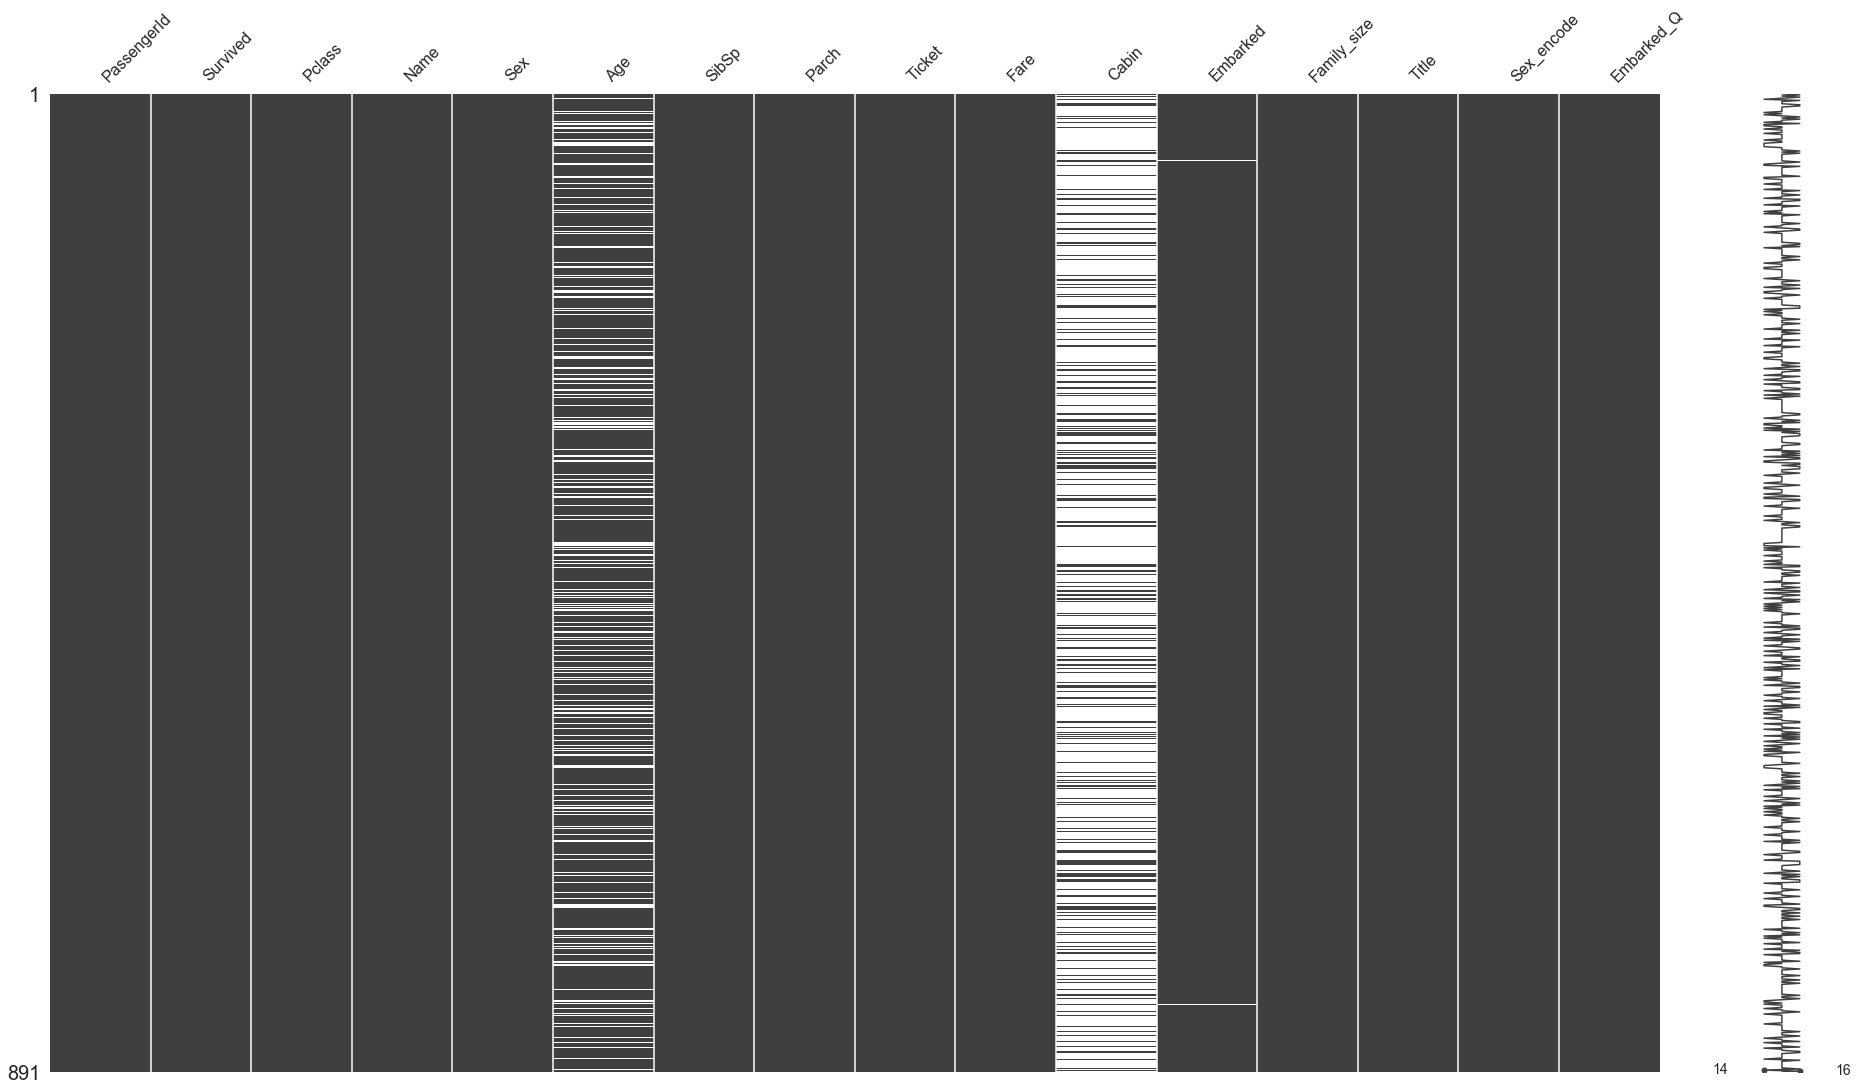

In [84]:
msno.matrix(train, figsize = (32,18))

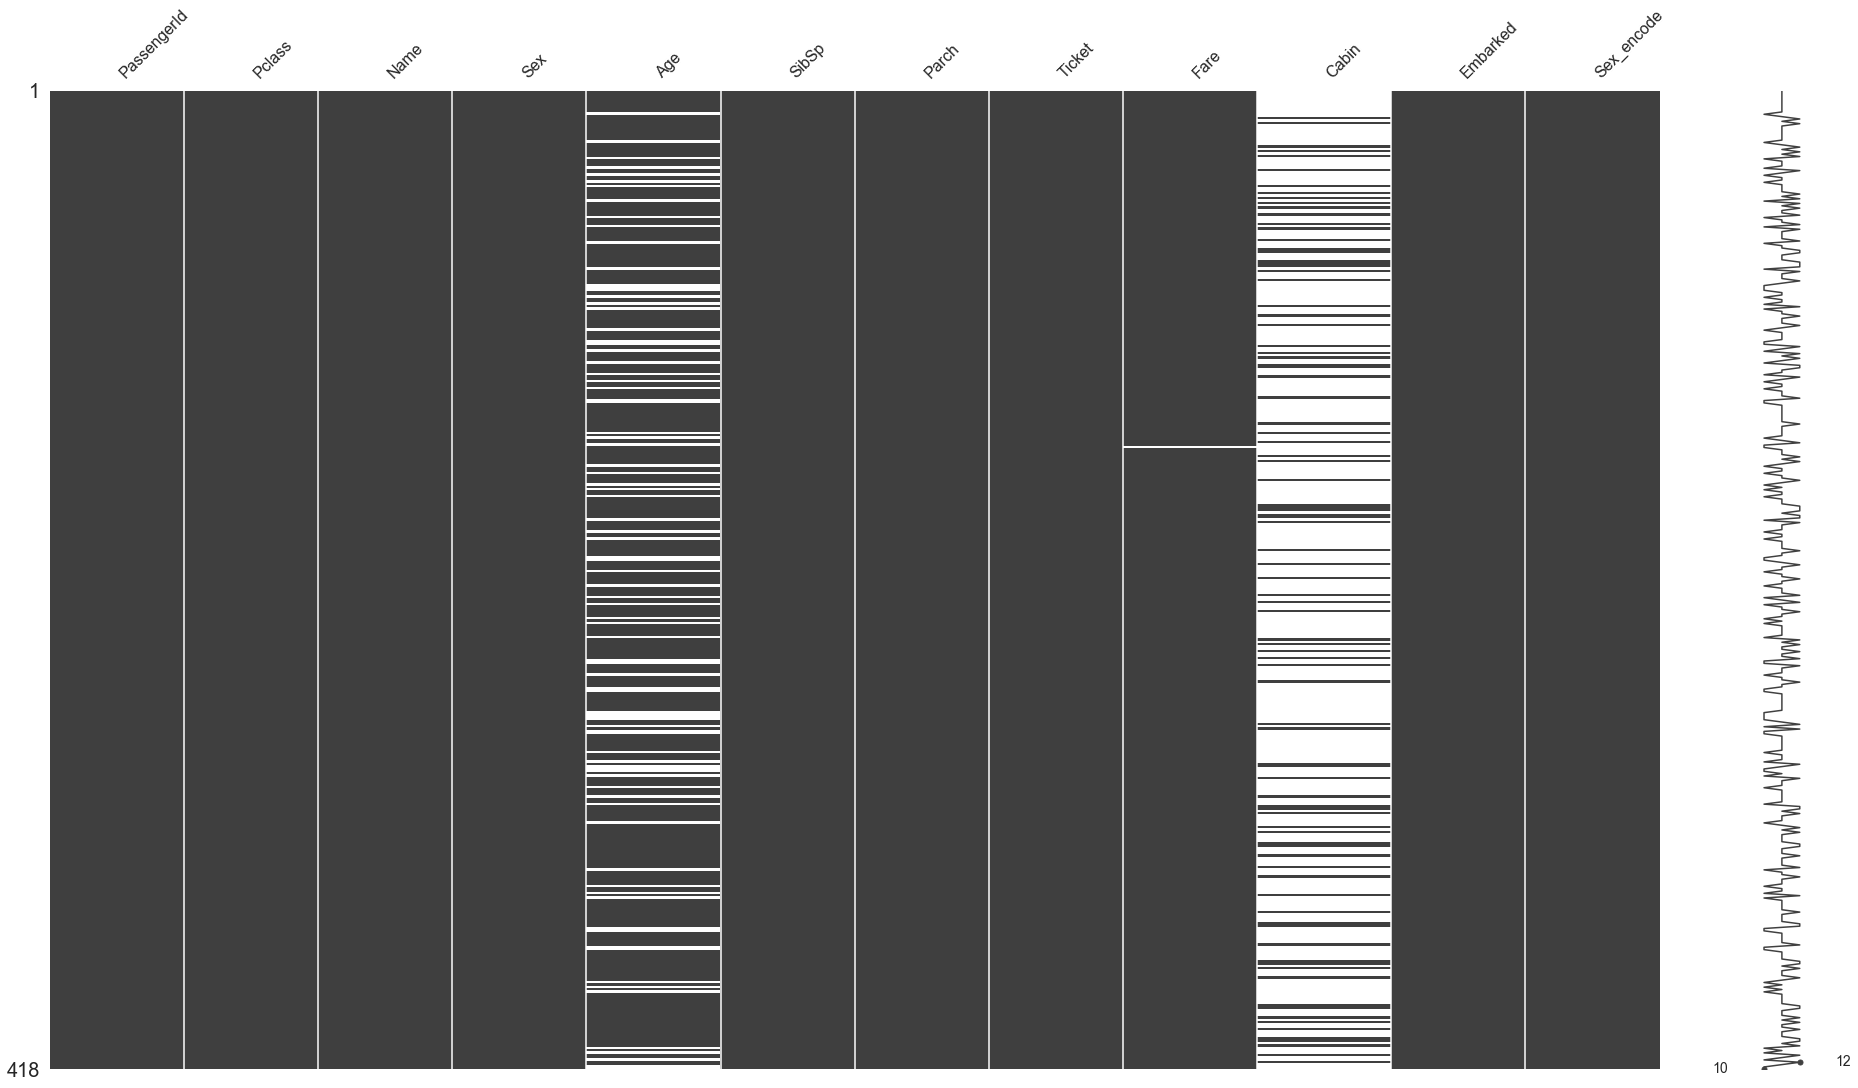

In [83]:
msno.matrix(test, figsize = (32,18))

## Explore

#### 1. SEX

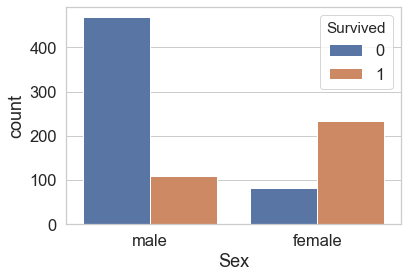

In [7]:
sns.countplot(data = train, x = 'Sex', hue = 'Survived')

In [8]:
pd.pivot_table(data= train, index = 'Sex', values = 'Survived')

,Survived
Sex,
female,0.742038
male,0.188908


#### 2. Pclass

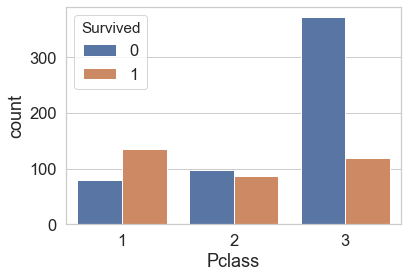

In [9]:
sns.countplot(data = train, x = 'Pclass', hue = 'Survived')

In [10]:
pd.pivot_table(data = train, index = 'Pclass', values = 'Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### 3. Embarked

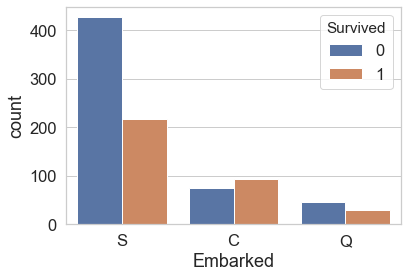

In [11]:
sns.countplot(data = train, x = 'Embarked', hue = 'Survived')

In [12]:
pd.pivot_table(data = train, index = 'Embarked', values = "Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


#### 4. Age&Fare

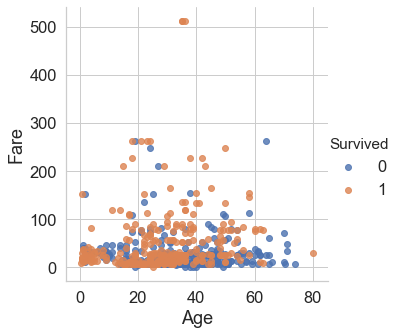

In [13]:
sns.lmplot(data = train, x = "Age", y = "Fare", hue = 'Survived', fit_reg = False)

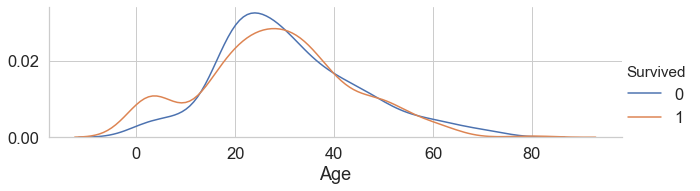

In [14]:
fa = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
fa.map(sns.kdeplot, 'Age')
fa.add_legend()

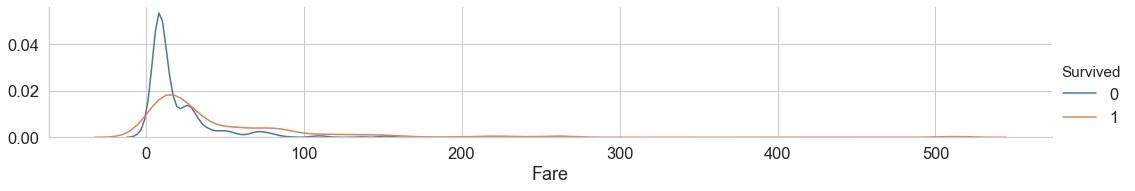

In [15]:
fa = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fa.map(sns.kdeplot, 'Fare')
fa.add_legend()

In [16]:
low_fare = train[train['Fare']<100]

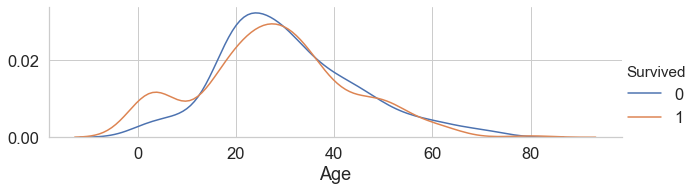

In [17]:
fa = sns.FacetGrid(low_fare, hue = 'Survived', aspect = 3)
fa.map(sns.kdeplot, 'Age')
fa.add_legend()

#### 5. SibSp & Parch

In [18]:
train['Family_size'] = train['SibSp'] + train["Parch"] + 1
print(train.shape)
train[['SibSp', 'Parch', 'Family_size']].head()

(891, 13)


,SibSp,Parch,Family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


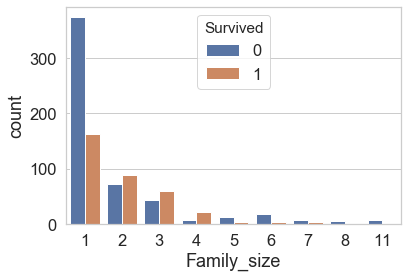

In [19]:
sns.countplot(data = train, x = 'Family_size', hue = "Survived")

In [20]:
pd.pivot_table(data = train, index = "Family_size", values = 'Survived')

,Survived
Family_size,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


#### 6. Name

In [71]:
#train['Title'] = train['Name'].str.split(',')
train['Title'] = train['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
print(train.shape)
train[["Name", "Title"]].head()

(891, 14)


,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


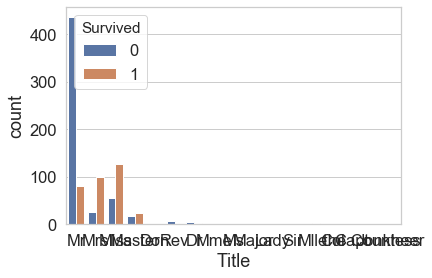

In [73]:
sns.countplot(data = train, x = 'Title', hue = 'Survived')

In [75]:
pd.pivot_table(data = train, index = 'Title', values = 'Survived', aggfunc = ['mean', 'sum'])

,mean,sum
,Survived,Survived
Title,,
Capt,0.000000,0
Col,0.500000,1
Don,0.000000,0
Dr,0.428571,3
Jonkheer,0.000000,0
Lady,1.000000,1
Major,0.500000,1
Master,0.575000,23


## Preprocessing

#### 1. Sex encode

In [77]:
train.loc[train['Sex'] == 'male', "Sex_encode"] = 1
train.loc[train['Sex'] == 'female', "Sex_encode"] = 0

print(train.shape)
train[['Sex', 'Sex_encode']].head()

(891, 15)


,Sex,Sex_encode
0,male,1.0
1,female,0.0
2,female,0.0
3,female,0.0
4,male,1.0


In [78]:
test.loc[train['Sex'] == 'male', "Sex_encode"] = 1
test.loc[train['Sex'] == 'female', "Sex_encode"] = 0

print(test.shape)
test[['Sex', 'Sex_encode']].head()

(418, 12)


,Sex,Sex_encode
0,male,1.0
1,female,0.0
2,male,0.0
3,male,0.0
4,female,1.0


#### 2. Embarked

In [87]:
train['Embarked_Q'] = train['Embarked'] == 'Q'
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'

print(train.shape)
train[['Embarked', 'Embarked_Q','Embarked_S','Embarked_C']].head()

(891, 18)


,Embarked,Embarked_Q,Embarked_S,Embarked_C
0,S,False,True,False
1,C,False,False,True
2,S,False,True,False
3,S,False,True,False
4,S,False,True,False


In [90]:
test['Embarked_Q'] = test['Embarked'] == 'Q'
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'

print(test.shape)
test[['Embarked', 'Embarked_Q','Embarked_S','Embarked_C']].head()

(418, 15)


,Embarked,Embarked_Q,Embarked_S,Embarked_C
0,Q,True,False,False
1,S,False,True,False
2,Q,True,False,False
3,S,False,True,False
4,S,False,True,False


#### 3. Age

In [91]:
train['Child'] = train['Age'] <= 15
print(train.shape)
train[['Age', "Child"]].head()

(891, 19)


,Age,Child
0,22.0,False
1,38.0,False
2,26.0,False
3,35.0,False
4,35.0,False


In [92]:
test['Child'] = test['Age'] <= 15
print(test.shape)
test[['Age', "Child"]].head()

(418, 16)


,Age,Child
0,34.5,False
1,47.0,False
2,62.0,False
3,27.0,False
4,22.0,False


In [93]:
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [94]:
test['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [96]:
train['Age_bool'] = train['Age'].isnull()
print(train.shape)
train[['Age', "Age_bool"]].head()

(891, 20)


,Age,Age_bool
0,22.0,False
1,38.0,False
2,26.0,False
3,35.0,False
4,35.0,False


In [97]:
test['Age_bool'] = test['Age'].isnull()
print(test.shape)
test[['Age', "Age_bool"]].head()

(418, 17)


,Age,Age_bool
0,34.5,False
1,47.0,False
2,62.0,False
3,27.0,False
4,22.0,False


In [98]:
pd.pivot_table(data = train, index = "Age_bool", values = 'Survived')

,Survived
Age_bool,
False,0.406162
True,0.293785


#### 4. Fare

In [99]:
train["Fare_fillin"] = train["Fare"]
print(train.shape)
train[["Fare", "Fare_fillin"]].head()

(891, 21)


,Fare,Fare_fillin
0,7.2500,7.2500
1,71.2833,71.2833
2,7.9250,7.9250
3,53.1000,53.1000
4,8.0500,8.0500


In [100]:
test["Fare_fillin"] = test["Fare"]
print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 18)


,Fare,Fare_fillin
0,7.8292,7.8292
1,7.0000,7.0000
2,9.6875,9.6875
3,8.6625,8.6625
4,12.2875,12.2875


In [101]:
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
152,NaN,0.0


#### 5. Family size

In [112]:
test["Family_size"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)
test[["SibSp", "Parch", "Family_size"]].head()

(418, 21)


,SibSp,Parch,Family_size
0,0,0,1
1,1,0,2
2,0,0,1
3,0,0,1
4,1,1,3


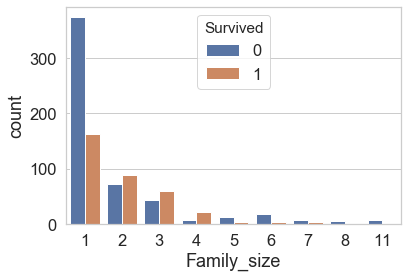

In [113]:
sns.countplot(data = train, x = 'Family_size', hue = "Survived")

In [114]:
train["Single"] = train["Family_size"] == 1
train["Small"] = (train["Family_size"] > 1) & (train["Family_size"] < 5)
train["Big"] = train["Family_size"] > 4

print(train.shape)
train[['Family_size', "Single","Small","Big"]].head()

(891, 24)


,Family_size,Single,Small,Big
0,2,False,True,False
1,2,False,True,False
2,1,True,False,False
3,2,False,True,False
4,1,True,False,False


In [115]:
test["Single"] = test["Family_size"] == 1
test["Small"] = (test["Family_size"] > 1) & (test["Family_size"] < 5)
test["Big"] = test["Family_size"] > 4

print(test.shape)
test[['Family_size', "Single","Small","Big"]].head()

(418, 24)


,Family_size,Single,Small,Big
0,1,True,False,False
1,2,False,True,False
2,1,True,False,False
3,1,True,False,False
4,3,False,True,False


#### 6. Name

In [127]:
test['Title'] = test['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

print(test.shape)
test[['Name', 'Title']]

(418, 25)


,Name,Title
0,"Kelly, Mr. James",Mr
1,"Wilkes, Mrs. James (Ellen Needs)",Mrs
2,"Myles, Mr. Thomas Francis",Mr
3,"Wirz, Mr. Albert",Mr
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",Mrs
...,...,...
413,"Spector, Mr. Woolf",Mr
414,"Oliva y Ocana, Dona. Fermina",Dona
415,"Saether, Mr. Simon Sivertsen",Mr
416,"Ware, Mr. Frederick",Mr


In [128]:
train["Master"] = train["Title"].str.contains("Master")
print(train.shape)
train['Master'].value_counts()

(891, 25)


False    851
True      40
Name: Master, dtype: int64

In [129]:
test["Master"] = test["Title"].str.contains("Master")
print(test.shape)
test['Master'].value_counts()

(418, 26)


False    397
True      21
Name: Master, dtype: int64

## Train

In [139]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q",
                 "Child","Age_bool", "Single", "Small", "Big", "Master"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'Child',
 'Age_bool',
 'Single',
 'Small',
 'Big',
 'Master']

In [140]:
label_name = "Survived"
label_name

'Survived'

In [141]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 12)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Age_bool,Single,Small,Big,Master
0,3,1.0,7.2500,False,True,False,False,False,False,True,False,False
1,1,0.0,71.2833,True,False,False,False,False,False,True,False,False
2,3,0.0,7.9250,False,True,False,False,False,True,False,False,False
3,1,0.0,53.1000,False,True,False,False,False,False,True,False,False
4,3,1.0,8.0500,False,True,False,False,False,True,False,False,False


In [142]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(418, 12)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q,Child,Age_bool,Single,Small,Big,Master
0,3,1.0,7.8292,False,False,True,False,False,True,False,False,False
1,3,0.0,7.0000,False,True,False,False,False,False,True,False,False
2,2,0.0,9.6875,False,False,True,False,False,True,False,False,False
3,3,0.0,8.6625,False,True,False,False,False,True,False,False,False
4,3,1.0,12.2875,False,True,False,False,False,False,True,False,False


In [143]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Model

In [144]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=8, random_state=0)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [145]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [146]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(418,)


array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [150]:
submission = pd.read_csv("C:/Users/User/Downloads/data/titanic/gender_submission.csv", index_col="PassengerId")
print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [151]:
submission["Survived"] = predictions

print(submission.shape)
submission.head()

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,1
895,0
896,0


In [152]:
submission.to_csv("C:/Users/User/Downloads/data/titanic/20200507_gender_submission.csv")

## 코드장 반복

In [153]:
import missingno as msno

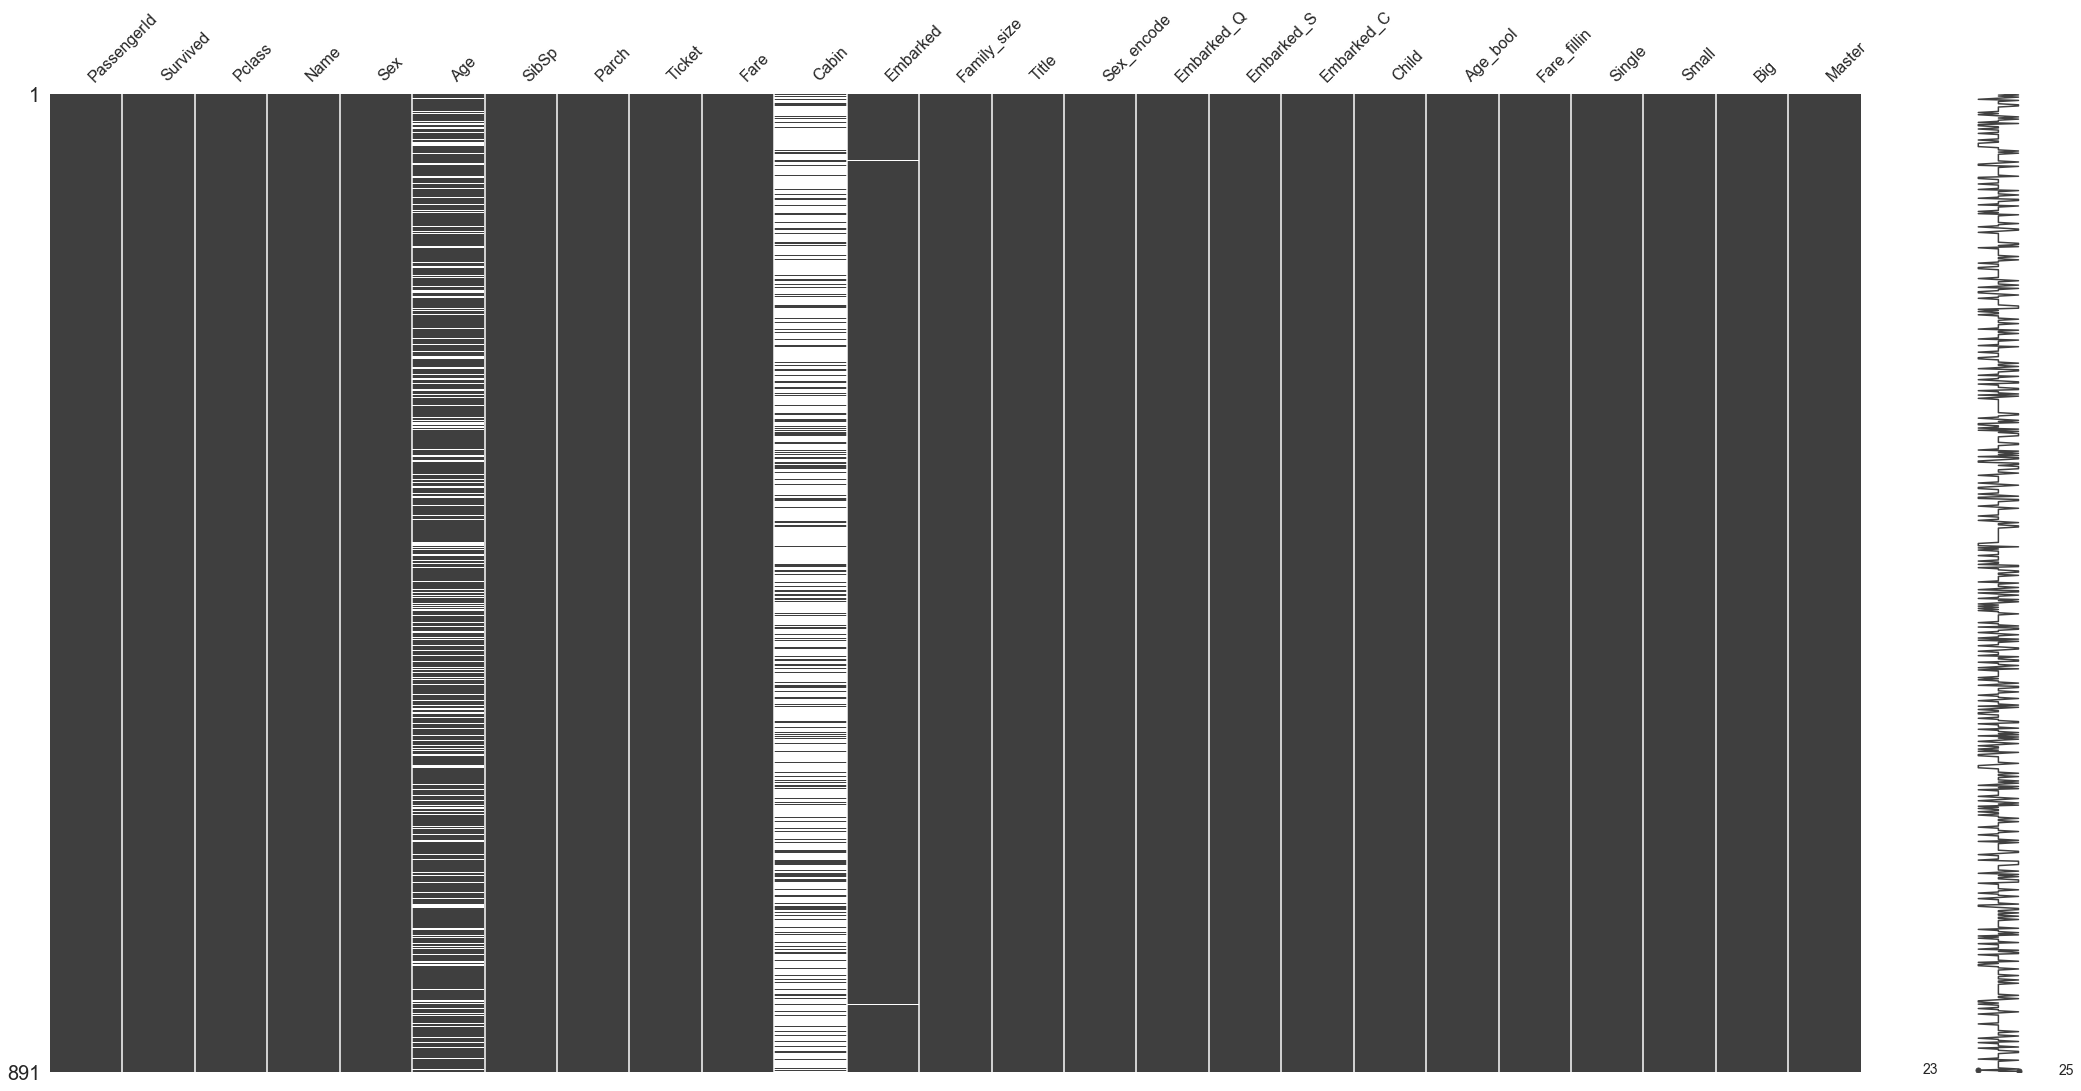

In [154]:
msno.matrix(train, figsize = (36,18))

In [155]:
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')

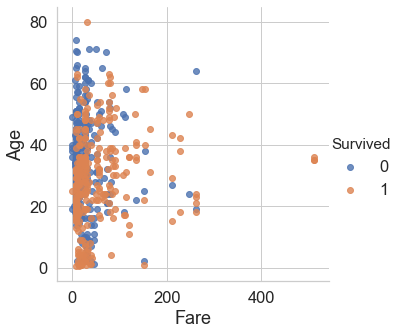

In [159]:
sns.lmplot(data = train, x = 'Fare', y = "Age", hue = 'Survived', fit_reg = False)

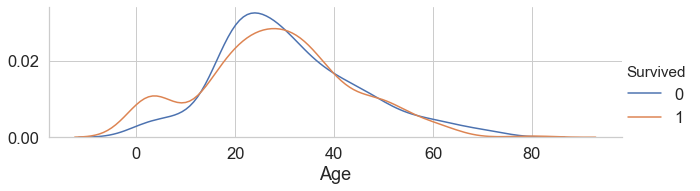

In [160]:
fa = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
fa.map(sns.kdeplot, 'Age')
fa.add_legend()

In [ ]:
fa = sns.FacetGrid(train, )